#Project Title - Laptop Price Prediction for SmartTech Co.

## Import The Necessary Libraries

In [6]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Read csv File

In [7]:
df = pd.read_csv('laptop.csv')

## Basic EDA

In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
df.shape

(1303, 13)

In [10]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [12]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [13]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30


In [14]:
df.duplicated().sum()

0

In [15]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unnamed: 0.1: 1303 unique values
Unnamed: 0: 1273 unique values
Company: 19 unique values
TypeName: 6 unique values
Inches: 25 unique values
ScreenResolution: 40 unique values
Cpu: 118 unique values
Ram: 10 unique values
Memory: 40 unique values
Gpu: 110 unique values
OpSys: 9 unique values
Weight: 189 unique values
Price: 777 unique values


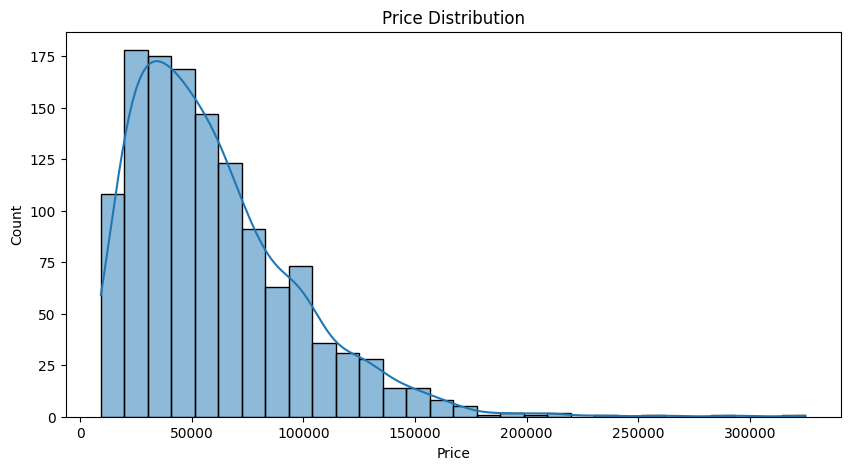

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()

## Data Preprocessing

In [17]:
# Drop columns which are not used in model building
df.drop(columns = ['Unnamed: 0.1','Unnamed: 0'],inplace = True)

In [18]:
# Replace '?' with null values
df.replace('?',np.nan,inplace = True)

In [19]:
# Drop only rows where "Price" (target variable) is missing
df = df.dropna(subset=["Price"])

In [20]:
# checking if null values still present
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,1
ScreenResolution,0
Cpu,0
Ram,0
Memory,1
Gpu,0
OpSys,0
Weight,1


In [21]:
# Converting Ram to numerical(removing 'GB')
df['Ram'] = df['Ram'].str.replace('GB','').astype('int32')

In [22]:
# Converting Weight to numerical(removing 'kg')
df['Weight'] = df['Weight'].str.replace('kg','').astype('float32')

In [23]:
# Converting Inches column to float
df['Inches'] = df['Inches'].astype('float32')

In [24]:
df.shape

(1273, 11)

In [25]:
# Check for duplicate rows
df.duplicated().sum()
# Remove duplicate rows if any
df = df.drop_duplicates()
# Verify removal
print(f"New dataset shape after removing duplicates: {df.shape}")

New dataset shape after removing duplicates: (1244, 11)


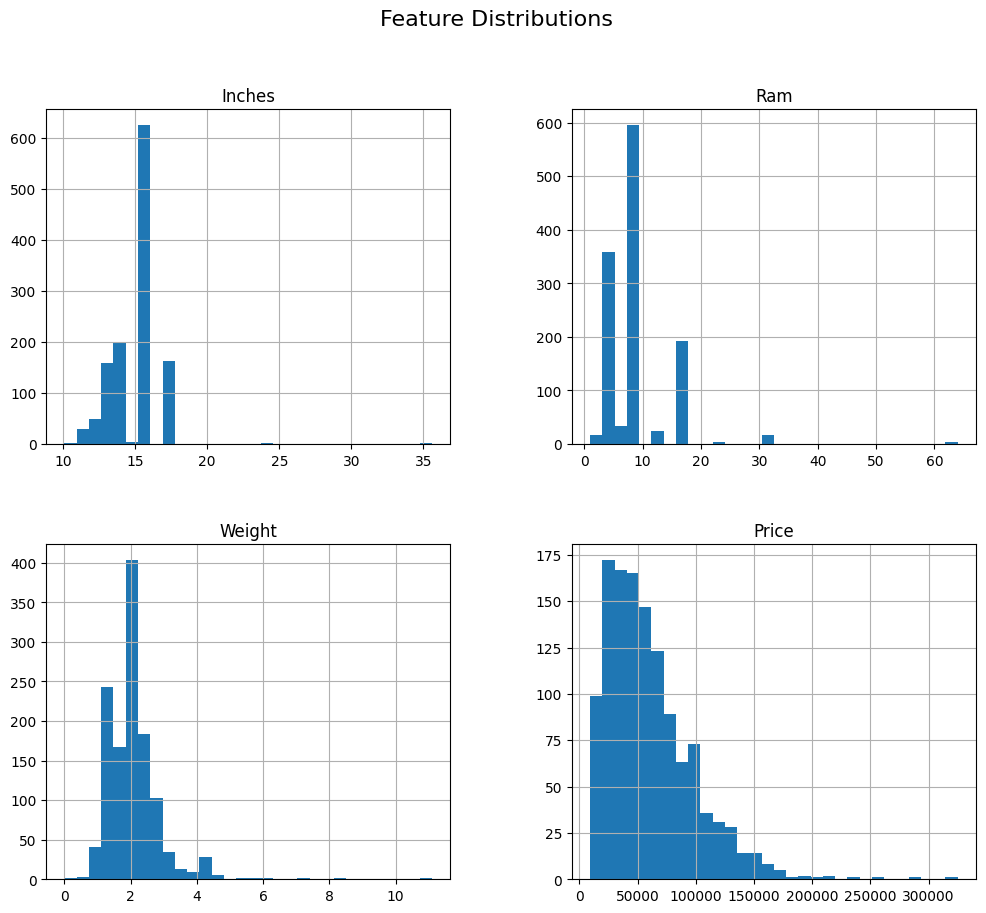

In [26]:
# Histogram for numerical columns
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

<Axes: xlabel='Company'>

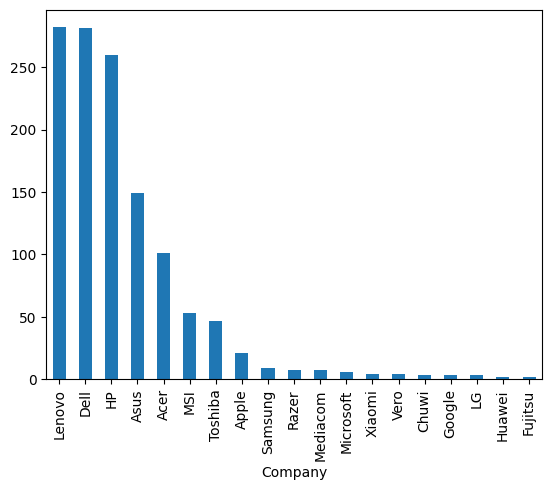

In [27]:
# Checking value counts for each company
df['Company'].value_counts().plot(kind = 'bar')

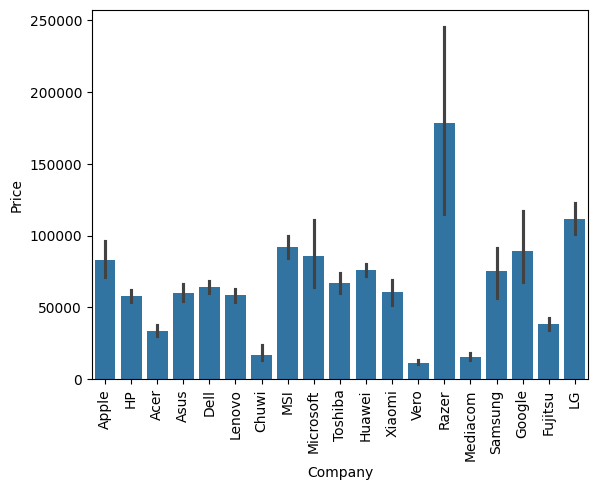

In [28]:
# Visualizing how Company name is impacting price
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='TypeName'>

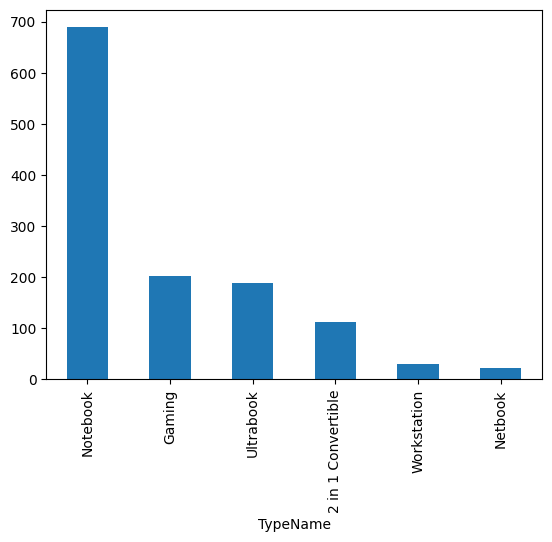

In [29]:
# Checking value counts for each Typename
df['TypeName'].value_counts().plot(kind = 'bar')

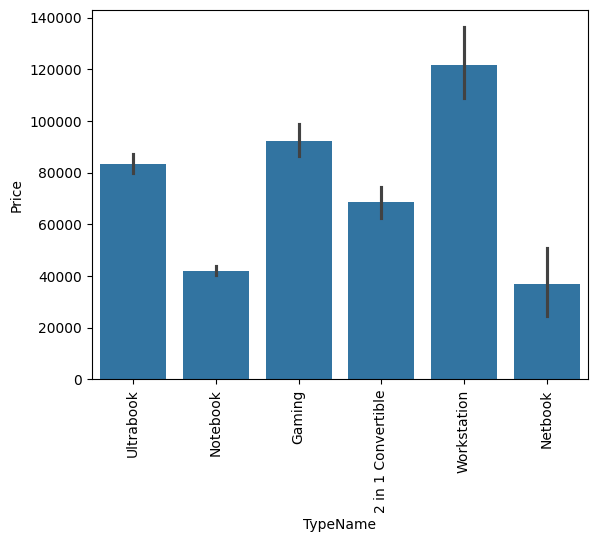

In [30]:
# Visualizing how typename is impacting oprice
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

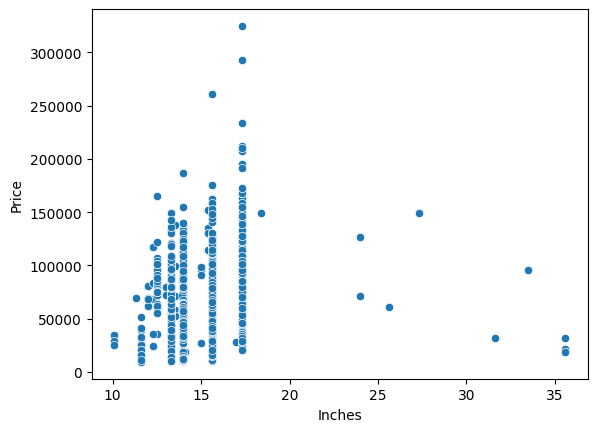

In [31]:
# Visualizing how Inches is impacting price
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [32]:
# Extracting ScreenResolution column

def extract_resolution_features(df):
    # Extract numeric resolution (Width x Height) using split()
    df['Screen_Width'] = df['ScreenResolution'].apply(lambda x: int(x.split()[-1].split('x')[0]) if 'x' in x else None)
    df['Screen_Height'] = df['ScreenResolution'].apply(lambda x: int(x.split()[-1].split('x')[1]) if 'x' in x else None)

    # Check if Touchscreen is present
    df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

    # Check if IPS Panel is present
    df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)

    return df

df = extract_resolution_features(df)


In [33]:
# Drop screen resolution column
df.drop(columns = ['ScreenResolution'],inplace = True)

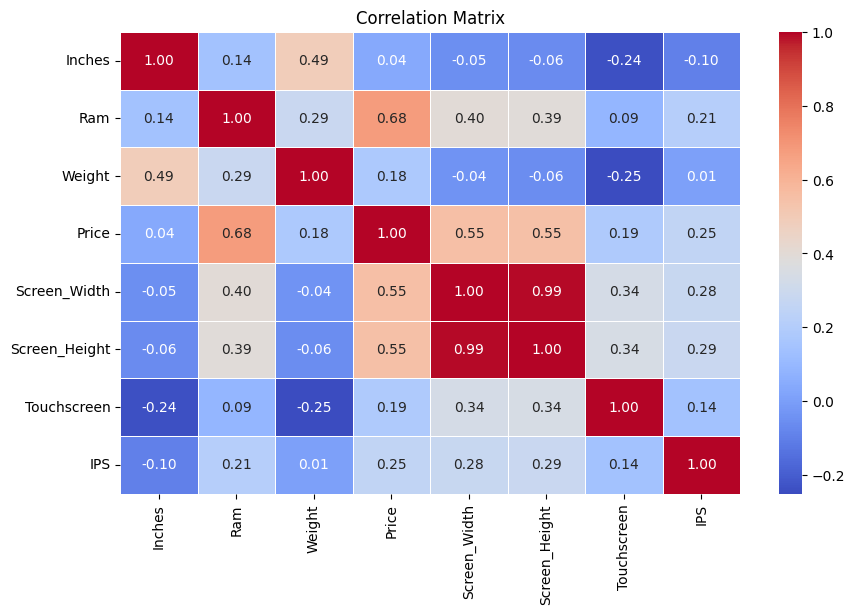

In [34]:
# Correlation matrix (only for numerical features)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [35]:
# From the correlation matrix, we see inches donot have strong correlation,so converting screenwidth,screenheight and inches to a single column as PPI(Pixel Per Inches)
df['ppi'] = (((df['Screen_Width']**2) + (df['Screen_Height']**2))**0.5/df['Inches']).astype('float')

In [36]:
# Drop the columns
df.drop(columns = ['Inches','Screen_Width','Screen_Height'], inplace=True)

In [37]:
# we will extract name of CPU which is first 3 words from Cpu column and then we will check which processor it is.
def fetch_processor(x):
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'
df['Cpu_brand'] = df['Cpu'].apply(lambda x: fetch_processor(x))

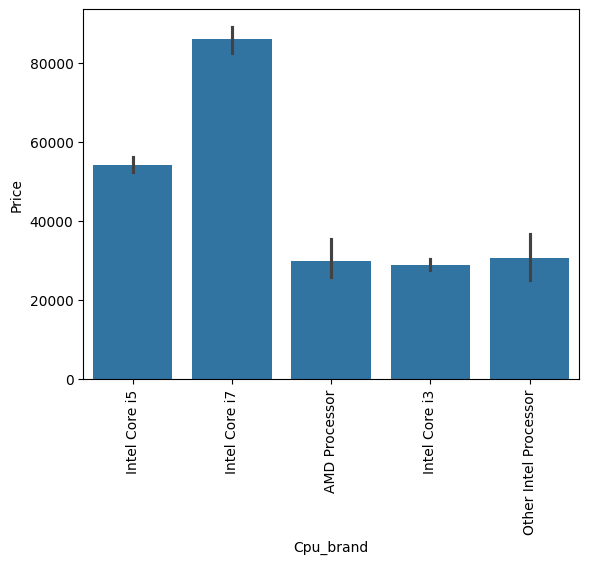

In [38]:
# Visualizing cpu brand impacting price
sns.barplot(x=df['Cpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


In [39]:
# Drop the cpu column
df.drop(columns = ['Cpu'],inplace = True)

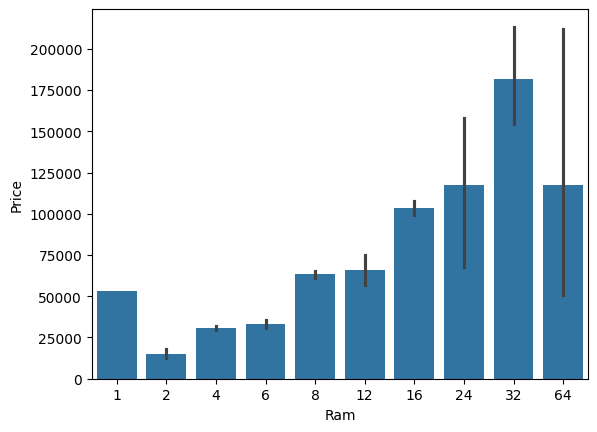

In [40]:
# Visualizing how Ram is impacting price
sns.barplot(x=df['Ram'],y= df['Price'])
plt.show()

In [41]:
import re

In [42]:
def extract_storage_values(memory_col):
    storage_info = []

    for mem in memory_col:
        if not isinstance(mem, str):  # Handle non-string values
            mem = ""

        hdd_size = 0
        ssd_size = 0
        flash_size = 0

        for part in mem.split():
            size_match = re.search(r'(\d+)(GB|TB)', part)  # Extract size with units
            if size_match:
                size = int(size_match.group(1))
                unit = size_match.group(2)
                if unit == "TB":
                    size *= 1024  # Convert TB to GB

                if "HDD" in mem:
                    hdd_size += size
                elif "SSD" in mem:
                    ssd_size += size
                elif "Flash" in mem:
                    flash_size += size

        storage_info.append((hdd_size, ssd_size, flash_size))

    return storage_info


In [43]:
# Apply the function to extract storage details
df['Memory'] = df['Memory'].astype(str)  # Convert all values to string
memory_features = extract_storage_values(df['Memory'])

In [44]:
# Add new storage columns to dataset
memory_features_df = pd.DataFrame(memory_features, columns=['HDD', 'SSD', 'Flash_Storage'])
df = pd.concat([df, memory_features_df], axis=1)


In [45]:
# Drop the Memory column
df.drop(columns=['Memory'], inplace=True)

In [46]:
# Extracting Gpu column
df['Gpu_brand'] = df['Gpu'].astype(str).apply(lambda x: x.split()[0] if isinstance(x, str) and ' ' in x else x)

In [47]:
# There is only 1 row of ARM GPU so remove it
df= df[df['Gpu_brand'] != 'ARM']

In [48]:
# Drop Gpu column
df.drop(columns =['Gpu'],inplace = True)

In [49]:
# Extracting OpSys column
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [50]:
# Applying the function using .loc[]
df.loc[:, 'os'] = df['OpSys'].apply(cat_os)

In [51]:
# Drop the OpSys column
df.drop(columns=['OpSys'],inplace=True)

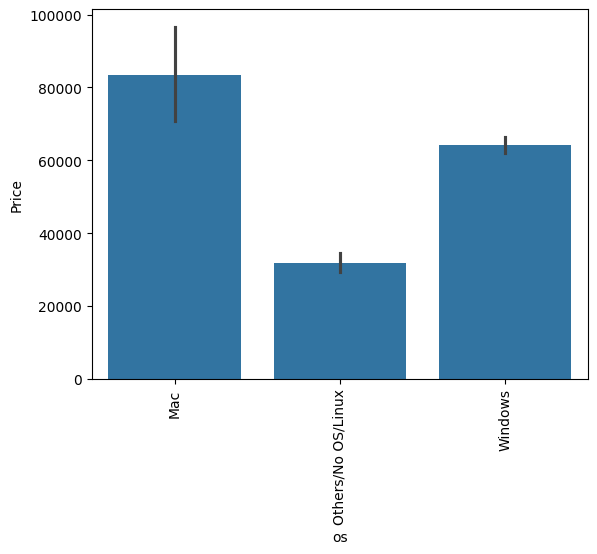

In [52]:
# Visualizing how OS is impacting price
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


### Justification: Why Not Hybrid or Flash_Storage?
Hybrid Storage:
Rarely found in modern laptops; most laptops have either SSD or HDD.
Combining SSD + HDD storage already captures its effect, making it redundant.

Flash Storage:
Mostly used in low-end devices (e.g., Chromebooks), less significant in high-end laptop pricing.
Price differences due to Flash Storage are not as impactful compared to SSD vs. HDD.

In [53]:
# Dropping Hybrid and Flash Storage Columns
df.drop(columns = ['Flash_Storage'],inplace = True)

In [54]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8.0,1.37,71378.6832,0.0,1.0,226.983001,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8.0,1.34,47895.5232,0.0,0.0,127.677938,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8.0,1.86,30636.0000,0.0,0.0,141.211995,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16.0,1.83,135195.3360,0.0,1.0,220.534629,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8.0,1.37,96095.8080,0.0,1.0,226.983001,Intel Core i5,0.0,256.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,512.0,nan,Others/No OS/Linux
978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,256.0,nan,Others/No OS/Linux
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,256.0,nan,Others/No OS/Linux
1060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,nan,Others/No OS/Linux


In [55]:
# Drop only rows where "Price" (target variable) is missing
df = df.dropna(subset=["Price"])

In [56]:
df.isnull().sum()

,0
Company,0
TypeName,0
Ram,0
Weight,1
Price,0
Touchscreen,0
IPS,0
ppi,1
Cpu_brand,0
HDD,29


In [57]:
# Dealing with missing values and using imputation methods
df["Weight"] = df["Weight"].fillna(df["Weight"].median())

<ipython-input-57-aca100e1c655>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Weight"] = df["Weight"].fillna(df["Weight"].median())


In [58]:
df["ppi"] = df["ppi"].fillna(df["ppi"].median())

<ipython-input-58-20550144bd63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ppi"] = df["ppi"].fillna(df["ppi"].median())


In [59]:
df["HDD"] = df["HDD"].fillna(df["HDD"].median())

<ipython-input-59-fb1dc8cd7eee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HDD"] = df["HDD"].fillna(df["HDD"].median())


In [60]:
df["SSD"] = df["SSD"].fillna(df["SSD"].median())

<ipython-input-60-0586df90831b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SSD"] = df["SSD"].fillna(df["SSD"].median())


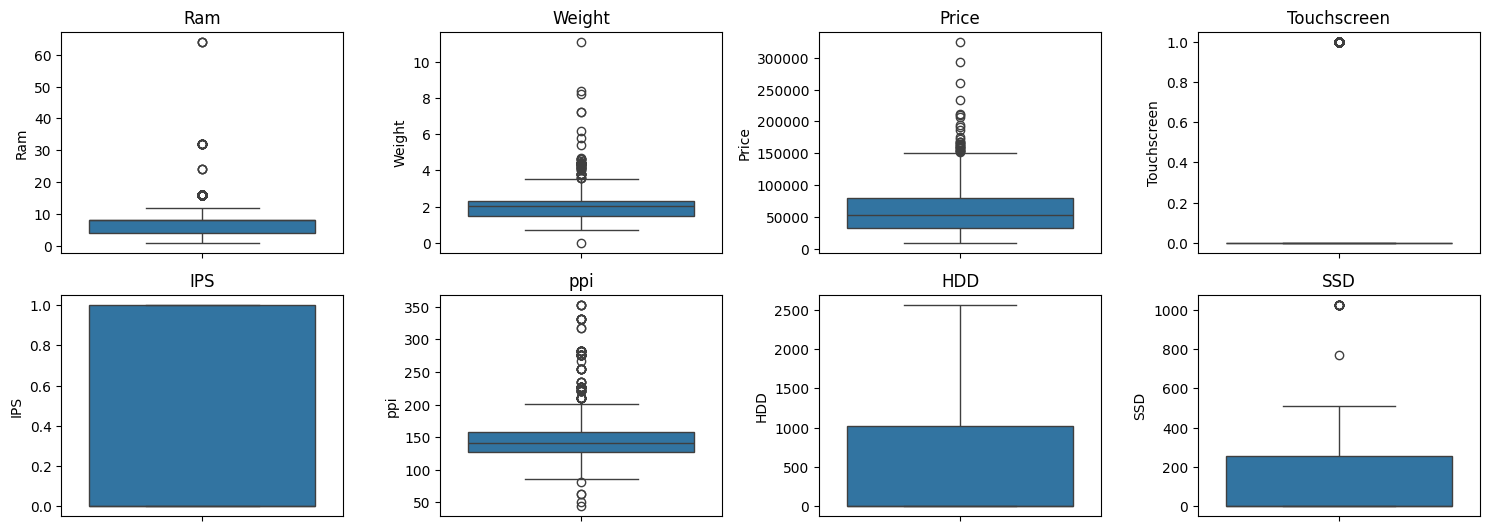

In [61]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Set up the figure size
plt.figure(figsize=(15, 8))

# Create a boxplot for each numerical feature
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Adjust grid size based on the number of features
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [62]:
# Make a copy of the original dataset
from scipy.stats.mstats import winsorize

df_winsor = df.copy()

# Define Winsorization limits (Capping at 5th and 95th percentile)
for col in df.select_dtypes(include=['number']).columns:
    df_winsor[col] = winsorize(df[col], limits=[0.05, 0.05])  # 5% on both tails

# Compare before vs after Winsorization
for col in df.select_dtypes(include=['number']).columns:
    print(f"{col}:")
    print(f"Before: Min = {df[col].min()}, Max = {df[col].max()}")
    print(f"After: Min = {df_winsor[col].min()}, Max = {df_winsor[col].max()}\n")

Ram:
Before: Min = 1.0, Max = 64.0
After: Min = 4.0, Max = 16.0

Weight:
Before: Min = 0.00019999999494757503, Max = 11.100000381469727
After: Min = 1.1799999475479126, Max = 3.3499999046325684

Price:
Before: Min = 9270.72, Max = 324954.72
After: Min = 17316.0, Max = 130482.72

Touchscreen:
Before: Min = 0.0, Max = 1.0
After: Min = 0.0, Max = 1.0

IPS:
Before: Min = 0.0, Max = 1.0
After: Min = 0.0, Max = 1.0

ppi:
Before: Min = 44.01946396073318, Max = 352.4651472131677
After: Min = 100.45466740469969, Max = 254.6713603736084

HDD:
Before: Min = 0.0, Max = 2560.0
After: Min = 0.0, Max = 1280.0

SSD:
Before: Min = 0.0, Max = 1024.0
After: Min = 0.0, Max = 512.0



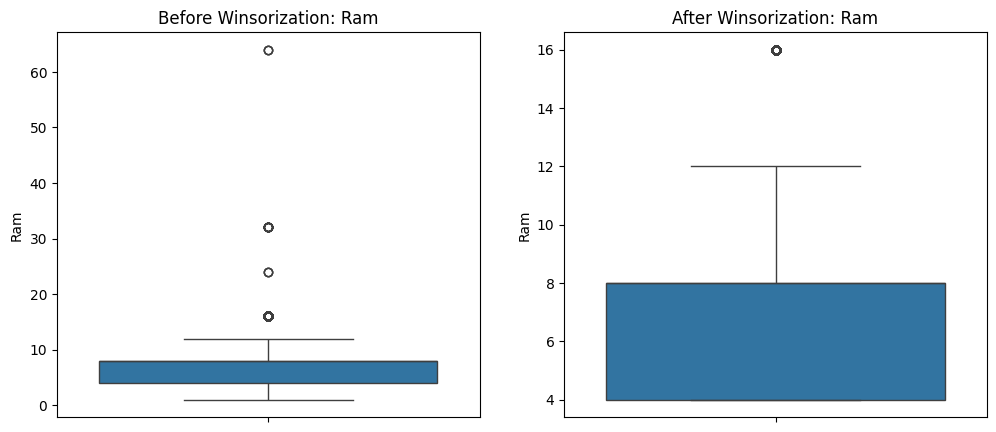

In [63]:
# Select a numerical column to compare
col = "Ram"  # Change this to any numerical column

plt.figure(figsize=(12,5))

# Before Winsorization
plt.subplot(1, 2, 1)
sns.boxplot(y=df[col])
plt.title(f'Before Winsorization: {col}')

# After Winsorization
plt.subplot(1, 2, 2)
sns.boxplot(y=df_winsor[col])
plt.title(f'After Winsorization: {col}')

plt.show()

In [64]:
# Apply log transformation to the 'Price' column
df_winsor['Price_log'] = np.log1p(df_winsor['Price'])  # log(1 + x) to avoid log(0)

# Check skewness again
print("After Log Transformation Skewness:", df_winsor['Price_log'].skew())

After Log Transformation Skewness: -0.17617827562664656


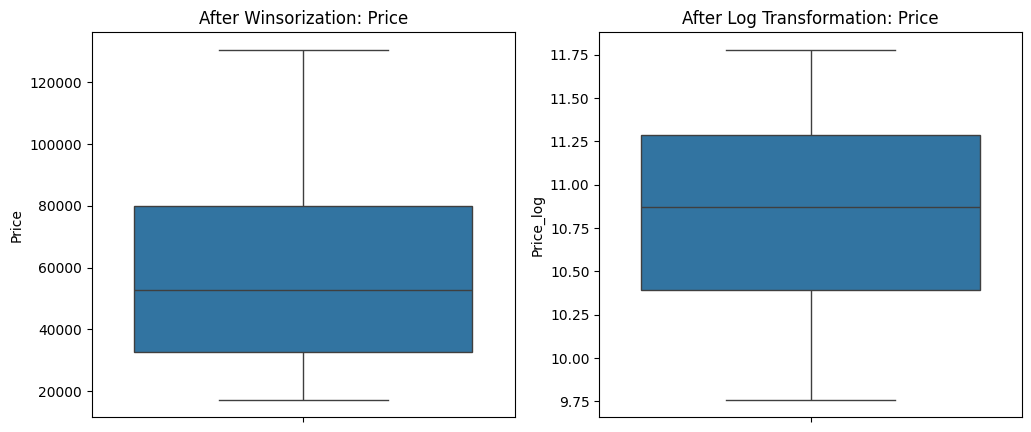

In [65]:
plt.figure(figsize=(12,5))

# After Winsorization Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=df_winsor['Price'])
plt.title('After Winsorization: Price')

# After Log Transformation Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_winsor['Price_log'])
plt.title('After Log Transformation: Price')

plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Select appropriate scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

# Apply scaling based on feature type
df['Weight'] = scaler_standard.fit_transform(df[['Weight']])  # Normally distributed
df['Price'] = scaler_robust.fit_transform(df[['Price']])  # Skewed with outliers
df[['HDD', 'SSD', 'RAM']] = scaler_minmax.fit_transform(df[['HDD', 'SSD', 'Ram']])  # Different scales
df['ppi'] = scaler_standard.fit_transform(df[['ppi']])  # Normal distribution

print(df.head())


  Company   TypeName   Ram    Weight     Price  Touchscreen  IPS       ppi  \
0   Apple  Ultrabook   8.0 -0.874139  0.396173          0.0  1.0  1.865859   
1   Apple  Ultrabook   8.0 -0.911025 -0.101740          0.0  0.0 -0.431135   
2      HP   Notebook   8.0 -0.271666 -0.467694          0.0  0.0 -0.118083   
3   Apple  Ultrabook  16.0 -0.308552  1.749276          0.0  1.0  1.716703   
4   Apple  Ultrabook   8.0 -0.874139  0.920249          0.0  1.0  1.865859   

       Cpu_brand  HDD    SSD Gpu_brand                  os       RAM  
0  Intel Core i5  0.0  0.125     Intel                 Mac  0.111111  
1  Intel Core i5  0.0  0.000     Intel                 Mac  0.111111  
2  Intel Core i5  0.0  0.250     Intel  Others/No OS/Linux  0.111111  
3  Intel Core i7  0.0  0.500       AMD                 Mac  0.238095  
4  Intel Core i5  0.0  0.250     Intel                 Mac  0.111111  


<ipython-input-66-9061c458de46>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = scaler_standard.fit_transform(df[['Weight']])  # Normally distributed
<ipython-input-66-9061c458de46>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = scaler_robust.fit_transform(df[['Price']])  # Skewed with outliers
<ipython-input-66-9061c458de46>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [67]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Select categorical columns
categorical_cols = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'os']

# Apply One-Hot Encoding
df_ohe = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_ohe.head())

    Ram    Weight     Price  Touchscreen  IPS       ppi  HDD    SSD       RAM  \
0   8.0 -0.874139  0.396173          0.0  1.0  1.865859  0.0  0.125  0.111111   
1   8.0 -0.911025 -0.101740          0.0  0.0 -0.431135  0.0  0.000  0.111111   
2   8.0 -0.271666 -0.467694          0.0  0.0 -0.118083  0.0  0.250  0.111111   
3  16.0 -0.308552  1.749276          0.0  1.0  1.716703  0.0  0.500  0.238095   
4   8.0 -0.874139  0.920249          0.0  1.0  1.865859  0.0  0.250  0.111111   

   Company_Apple  ...  TypeName_Ultrabook  TypeName_Workstation  \
0           True  ...                True                 False   
1           True  ...                True                 False   
2          False  ...               False                 False   
3           True  ...                True                 False   
4           True  ...                True                 False   

   Cpu_brand_Intel Core i3  Cpu_brand_Intel Core i5  Cpu_brand_Intel Core i7  \
0                    False    

In [68]:
from sklearn.preprocessing import LabelEncoder

df_le = df.copy()  # Make a copy for Label Encoding

for col in ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'os']:
    le = LabelEncoder()
    df_le[col] = le.fit_transform(df_le[col])

print(df_le.head())


   Company  TypeName   Ram    Weight     Price  Touchscreen  IPS       ppi  \
0        1         4   8.0 -0.874139  0.396173          0.0  1.0  1.865859   
1        1         4   8.0 -0.911025 -0.101740          0.0  0.0 -0.431135   
2        7         3   8.0 -0.271666 -0.467694          0.0  0.0 -0.118083   
3        1         4  16.0 -0.308552  1.749276          0.0  1.0  1.716703   
4        1         4   8.0 -0.874139  0.920249          0.0  1.0  1.865859   

   Cpu_brand  HDD    SSD  Gpu_brand  os       RAM  
0          2  0.0  0.125          1   0  0.111111  
1          2  0.0  0.000          1   0  0.111111  
2          2  0.0  0.250          1   1  0.111111  
3          3  0.0  0.500          0   0  0.238095  
4          2  0.0  0.250          1   0  0.111111  


## Data Splitting(Test-Train split)

In [69]:
from sklearn.model_selection import train_test_split

# Define target variable
y_ohe = df_ohe['Price']
y_le = df_le['Price']

# Drop target column from feature sets
X_ohe = df_ohe.drop(columns=['Price'])
X_le = df_le.drop(columns=['Price'])

# Split into training (80%) and testing (20%) sets
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=42)
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size=0.2, random_state=42)


### Model Building

In [70]:
from sklearn.ensemble import RandomForestRegressor
# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models on OHE data
lr.fit(X_train_ohe, y_train_ohe)


# Train models on Label Encoded data
rf.fit(X_train_le, y_train_le)


# Predictions
y_pred_lr = lr.predict(X_test_ohe)
y_pred_rf = rf.predict(X_test_le)

### Model Evaluation

In [71]:
# Define evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}\n")

# Evaluate models
evaluate_model(y_test_ohe, y_pred_lr, "Linear Regression (OHE)")
evaluate_model(y_test_le, y_pred_rf, "Random Forest (Label Encoded)")

Linear Regression (OHE) Performance:
MAE: 0.30
MSE: 0.20
RMSE: 0.45
R² Score: 0.6329

Random Forest (Label Encoded) Performance:
MAE: 0.26
MSE: 0.18
RMSE: 0.42
R² Score: 0.6861



### Hyperparameter Tuning

In [72]:
# Hyperparameter Tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples required at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,  # Number of different combinations to try
    cv=5,  # 5-Fold Cross-Validation
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit on training data
random_search.fit(X_train_le, y_train_le)

# Get best model
best_rf = random_search.best_estimator_

# Evaluate the tuned model
y_pred_best_rf = best_rf.predict(X_test_le)

evaluate_model(y_test_le, y_pred_best_rf, "Tuned Random Forest")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Tuned Random Forest Performance:
MAE: 0.25
MSE: 0.16
RMSE: 0.40
R² Score: 0.7153

